# Task 2: Credit Risk Prediction
Predict whether a loan application will be approved based on demographic and financial features.
This task uses the **Loan Prediction Dataset** (train.csv & test.csv).

In [2]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [3]:
#  Load training data
df = pd.read_csv('../data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###  Dataset Understanding
- Target: Loan_Status (Y = approved, N = not approved)

- Inputs: Features like ApplicantIncome, Education, Credit_History, etc.

- Issues:

  - Some columns have missing values.

  - Categorical data (like gender, education) needs to be converted to numbers.

# Data Cleaning and Preparation

#### Handle Missing Values

In [68]:
# Impute categorical features with mode
cat_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in cat_features:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [69]:
# Impute numerical features with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


#### Encode Categorical Variables ####

In [70]:
# Label Encoding for binary categorical variables
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# One-hot encoding for multiclass variables
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)


In [71]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,False,False,True


In [72]:
# Define input (X) and target (y)
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

#  Exploratory Data Analysis (EDA)
Feature distributions and relationships with the target.

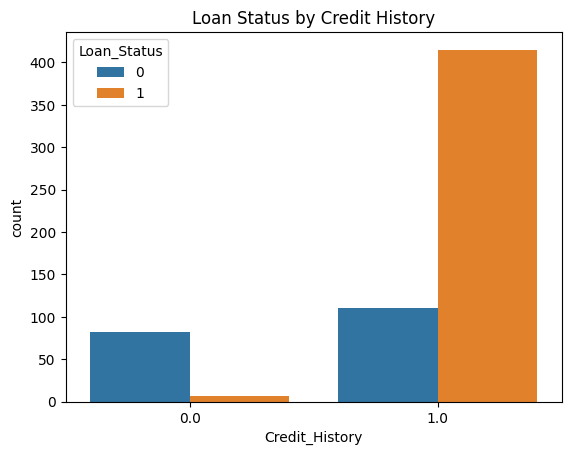

In [73]:
# Plot Credit History vs Loan Status
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Loan Status by Credit History')
plt.show()

The above graph shows:
- People with good credit history (1) mostly got their loans approved.
- People with bad credit history (0) mostly got their loans rejected.

Conclusion:
Good credit history = higher chance of loan approval.

# Model Training and Testing
This section focuses on training classification models to predict loan approval status. We will use Logistic Regression and Decision Tree Classifier, two commonly used algorithms for binary classification tasks.

In [74]:
# Data Splitting
# Split and train a Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Trainig Classification Model

##### Logistic Regression

In [83]:
#  Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


##### Decision Tree

In [84]:
#  Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


#### Model Evaluation

#####   Logistic Regression Evaluation


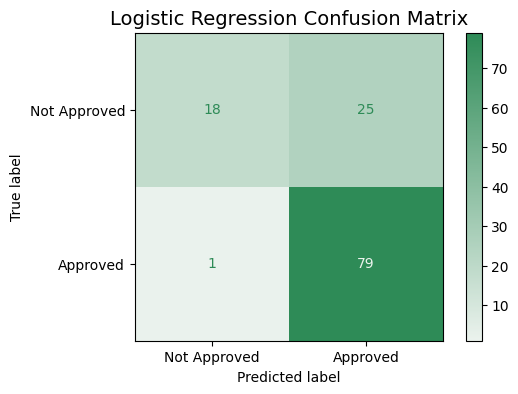

Logistic Regression Accuracy: 78.86%


In [87]:

# Confusion Matrix with light shades
cm_lr = confusion_matrix(y_test, y_pred_lr)
labels = ['Not Approved', 'Approved']
cmap_lr = sns.light_palette("seagreen", as_cmap=True)  # pastel green

fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels).plot(ax=ax, cmap=cmap_lr, colorbar=True)
plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.grid(False)
plt.show()

# For Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}%")


##### Decision Tree Evaluation

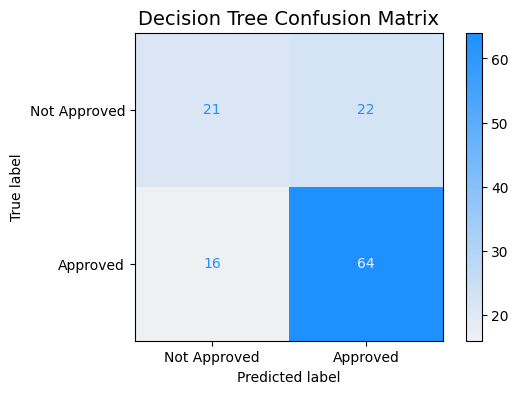

✅ Decision Tree Accuracy: 69.11%


In [88]:

# Confusion Matrix with light shades
cm_dt = confusion_matrix(y_test, y_pred_dt)
cmap_dt = sns.light_palette("dodgerblue", as_cmap=True)  # pastel blue

fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels).plot(ax=ax, cmap=cmap_dt, colorbar=True)
plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.grid(False)
plt.show()


# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f" Decision Tree Accuracy: {accuracy_dt:.2f}%")


# Conclusion
- Accuracy: Indicates overall performance of classification.
- Credit history is a strong predictor of loan approval.
- Model can be further improved using hyperparameter tuning or boosting algorithms.

##### Usage Example

In [89]:
#  Define a new applicant (must match the training feature structure!)
new_applicant = {
    'Gender': 1,                # Male
    'Married': 1,               # Married
    'Education': 0,             # Graduate
    'Self_Employed': 0,         # Not self-employed
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 1500,
    'LoanAmount': 130,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 0,
    'Property_Area_Semiurban': 1,
    'Property_Area_Urban': 0
}

#  Convert to DataFrame for prediction
new_applicant_df = pd.DataFrame([new_applicant])

#  Predict using the trained model (Logistic Regression or Decision Tree)
predicted_status = lr.predict(new_applicant_df)[0]  # Or use dt.predict()

#  Interpret the result
print("Loan Status Prediction:", "Approved ✅" if predicted_status == 1 else "Rejected ❌")


Loan Status Prediction: Approved ✅
